In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from networks import NoKafnet, Kafnet
import utils.datasetsUtils.MINST as MINST
from utils.datasetsUtils.taskManager import SingleTargetClassificationTask, NoTask
import configs.configClasses as configClasses
from torchvision.transforms import transforms
import torch
import networks.continual_learning as continual_learning
from Trainer import Trainer
import matplotlib.pyplot as plt
from collections import defaultdict
from copy import deepcopy
import numpy as np

In [3]:
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(0)

In [4]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

True
1
GeForce GTX 1050


In [5]:
configOnline = configClasses.OnlineLearningConfig()
configOnline.L1_REG = 0
configOnline.EPOCHS = 20
configOnline.SAVE_PATH = './models/permuted_minst/kaf_vs_multikaf'
configOnline.IS_CONVOLUTIONAL = False
configOnline.MODEL_NAME = ''
print(configOnline)

CONFIG PARAMETERS
BATCH_SIZE: 64
DEVICE: cuda
EPOCHS: 20
EWC_IMPORTANCE: 1000
EWC_SAMPLE_SIZE: 250
EWC_TYPE: <class 'networks.continual_learning.OnlineEWC'>
GAMMA: 1.0
IS_CONVOLUTIONAL: False
ITERS: 1
L1_REG: 0
LOSS: cross_entropy
LR: 0.001
MODEL_NAME: 
OPTIMIZER: SGD
RUN_NAME: default
SAVE_PATH: ./models/permuted_minst/kaf_vs_multikaf
USE_EWC: True
USE_TENSORBOARD: True



In [6]:
dataset = MINST.PermutedMINST('../data/minst', download=True, n_permutation=4,
                        force_download=False, train_split=0.8, transform=None, target_transform=None)
dataset.load_dataset()

../data/minst/download
task #0 with train 56000 and test 14000 images (label: 0)
task #1 with train 56000 and test 14000 images (label: 1)
task #2 with train 56000 and test 14000 images (label: 2)
task #3 with train 56000 and test 14000 images (label: 3)


In [7]:
kaf = Kafnet.KAFMLP(len(dataset.class_to_idx), hidden_size=int(400*0.7))

In [8]:
experiments_kaf = [('kaf_no_cont_learning', None), 
               ('kaf_ewc', continual_learning.OnlineEWC), 
               ('kaf_gem', continual_learning.GEM)]
results_kaf = []

In [9]:
for name, tec in experiments_kaf:
    print(name)
    
    n = deepcopy(kaf)
    config = deepcopy(configOnline)
    
    config.MODEL_NAME = name

    if 'name' == 'gem':
        config.EWC_IMPORTANCE = 0.5
    config.EWC_TYPE = tec
    
    trainer = Trainer(n, deepcopy(dataset), config)

    r = trainer.load()
    if not r:
        r = trainer.all_tasks()
    
    results_kaf.append((name, r))
    
    del trainer
    del n

kaf_no_cont_learning


/media/jary/DATA/Uni/tesi/codice/Trainer.py:37: UserWarning: Ewc type is set to None  
  warnings.warn("Ewc type is set to None  ")


kaf_ewc
kaf_gem


In [10]:
multikaf = Kafnet.MultiKAFMLP(len(dataset.class_to_idx), hidden_size=int(400*0.8),  kaf_init_fcn=None,
                             trainable_dict=False, kernel_combination='sum')

In [11]:
experiments_multikaf = [('multikaf_no_cont_learning', None), 
               ('multikaf_ewc', continual_learning.OnlineEWC), 
               ('multikaf_gem', continual_learning.GEM)]
results_multikaf = []

In [12]:
for name, tec in experiments_multikaf:
    print(name)
    
    n = deepcopy(multikaf)
    config = deepcopy(configOnline)
    
    config.MODEL_NAME = name

    if 'name' == 'gem':
        config.EWC_IMPORTANCE = 0.5
    config.EWC_TYPE = tec
    
    trainer = Trainer(n, deepcopy(dataset), config)

    r = trainer.load()
    if not r:
        r = trainer.all_tasks()
    
    results_multikaf.append((name, r))
    
    del trainer
    del n

multikaf_no_cont_learning
multikaf_ewc


Training task (ewc) 0, epoch 1: 100%|██████████| 875/875 [00:21<00:00, 40.77it/s, loss=1.17, batch#=875]
Testing task 0: 219it [00:03, 66.50it/s, batch#=219]
Training task (ewc) 0, epoch 2: 100%|██████████| 875/875 [00:17<00:00, 49.34it/s, loss=0.432, batch#=875]
Testing task 0: 219it [00:03, 67.49it/s, batch#=219]
Training task (ewc) 0, epoch 3: 100%|██████████| 875/875 [00:17<00:00, 49.35it/s, loss=0.336, batch#=875]
Testing task 0: 219it [00:03, 67.79it/s, batch#=219]
Training task (ewc) 0, epoch 4: 100%|██████████| 875/875 [00:17<00:00, 49.39it/s, loss=0.285, batch#=875]
Testing task 0: 219it [00:03, 67.63it/s, batch#=219]
Training task (ewc) 0, epoch 5: 100%|██████████| 875/875 [00:17<00:00, 49.48it/s, loss=0.247, batch#=875]
Testing task 0: 219it [00:03, 67.90it/s, batch#=219]
Training task (ewc) 0, epoch 6: 100%|██████████| 875/875 [00:17<00:00, 49.48it/s, loss=0.222, batch#=875]
Testing task 0: 219it [00:03, 67.88it/s, batch#=219]
Training task (ewc) 0, epoch 7: 100%|██████████

Testing task 1: 219it [00:03, 57.27it/s, batch#=219]
Training task (ewc) 2, epoch 3: 100%|██████████| 875/875 [00:28<00:00, 30.84it/s, loss=2.12, batch#=875]
Testing task 2: 219it [00:03, 59.21it/s, batch#=219]
Testing task 0: 219it [00:03, 59.95it/s, batch#=219]
Testing task 1: 219it [00:03, 58.07it/s, batch#=219]
Training task (ewc) 2, epoch 4: 100%|██████████| 875/875 [00:29<00:00, 29.86it/s, loss=2.04, batch#=875]
Testing task 2: 219it [00:04, 53.37it/s, batch#=219]
Testing task 0: 219it [00:04, 53.75it/s, batch#=219]
Testing task 1: 219it [00:03, 58.24it/s, batch#=219]
Training task (ewc) 2, epoch 5: 100%|██████████| 875/875 [00:29<00:00, 30.01it/s, loss=1.98, batch#=875]
Testing task 2: 219it [00:03, 56.76it/s, batch#=219]
Testing task 0: 219it [00:04, 54.66it/s, batch#=219]
Testing task 1: 219it [00:03, 57.52it/s, batch#=219]
Training task (ewc) 2, epoch 6: 100%|██████████| 875/875 [00:29<00:00, 29.78it/s, loss=1.94, batch#=875]
Testing task 2: 219it [00:04, 54.41it/s, batch#=21

Testing task 3: 219it [00:03, 57.69it/s, batch#=219]
Testing task 0: 219it [00:04, 54.59it/s, batch#=219]
Testing task 1: 219it [00:03, 59.68it/s, batch#=219]
Testing task 2: 219it [00:03, 58.73it/s, batch#=219]
Training task (ewc) 3, epoch 12: 100%|██████████| 875/875 [00:26<00:00, 35.11it/s, loss=4.85, batch#=875]
Testing task 3: 219it [00:03, 63.93it/s, batch#=219]
Testing task 0: 219it [00:03, 61.43it/s, batch#=219]
Testing task 1: 219it [00:03, 60.76it/s, batch#=219]
Testing task 2: 219it [00:03, 61.19it/s, batch#=219]
Training task (ewc) 3, epoch 13: 100%|██████████| 875/875 [00:25<00:00, 34.40it/s, loss=4.82, batch#=875]
Testing task 3: 219it [00:03, 60.22it/s, batch#=219]
Testing task 0: 219it [00:03, 64.28it/s, batch#=219]
Testing task 1: 219it [00:03, 65.17it/s, batch#=219]
Testing task 2: 219it [00:03, 65.01it/s, batch#=219]
Training task (ewc) 3, epoch 14: 100%|██████████| 875/875 [00:24<00:00, 35.60it/s, loss=4.8, batch#=875] 
Testing task 3: 219it [00:03, 63.94it/s, batch

multikaf_gem


Training task (ewc) 0, epoch 1: 100%|██████████| 875/875 [00:18<00:00, 46.78it/s, loss=1.17, batch#=875]
Testing task 0: 219it [00:03, 62.98it/s, batch#=219]
Training task (ewc) 0, epoch 2: 100%|██████████| 875/875 [00:18<00:00, 47.03it/s, loss=0.433, batch#=875]
Testing task 0: 219it [00:03, 64.73it/s, batch#=219]
Training task (ewc) 0, epoch 3: 100%|██████████| 875/875 [00:18<00:00, 47.71it/s, loss=0.339, batch#=875]
Testing task 0: 219it [00:03, 64.46it/s, batch#=219]
Training task (ewc) 0, epoch 4: 100%|██████████| 875/875 [00:19<00:00, 43.78it/s, loss=0.286, batch#=875]
Testing task 0: 219it [00:03, 65.30it/s, batch#=219]
Training task (ewc) 0, epoch 5: 100%|██████████| 875/875 [00:18<00:00, 47.49it/s, loss=0.247, batch#=875]
Testing task 0: 219it [00:03, 64.38it/s, batch#=219]
Training task (ewc) 0, epoch 6: 100%|██████████| 875/875 [00:18<00:00, 47.48it/s, loss=0.219, batch#=875]
Testing task 0: 219it [00:03, 62.88it/s, batch#=219]
Training task (ewc) 0, epoch 7: 100%|██████████

Testing task 1: 219it [00:03, 63.02it/s, batch#=219]
Training task (ewc) 2, epoch 3: 100%|██████████| 875/875 [00:46<00:00, 18.63it/s, loss=0.486, batch#=875]
Testing task 2: 219it [00:03, 63.62it/s, batch#=219]
Testing task 0: 219it [00:03, 66.28it/s, batch#=219]
Testing task 1: 219it [00:03, 65.54it/s, batch#=219]
Training task (ewc) 2, epoch 4: 100%|██████████| 875/875 [00:46<00:00, 18.79it/s, loss=0.429, batch#=875]
Testing task 2: 219it [00:03, 64.23it/s, batch#=219]
Testing task 0: 219it [00:03, 64.99it/s, batch#=219]
Testing task 1: 219it [00:03, 65.98it/s, batch#=219]
Training task (ewc) 2, epoch 5: 100%|██████████| 875/875 [00:43<00:00, 21.07it/s, loss=0.386, batch#=875]
Testing task 2: 219it [00:03, 65.00it/s, batch#=219]
Testing task 0: 219it [00:03, 62.57it/s, batch#=219]
Testing task 1: 219it [00:03, 64.23it/s, batch#=219]
Training task (ewc) 2, epoch 6: 100%|██████████| 875/875 [00:46<00:00, 18.99it/s, loss=0.366, batch#=875]
Testing task 2: 219it [00:03, 61.94it/s, batch

Testing task 3: 219it [00:03, 56.83it/s, batch#=219]
Testing task 0: 219it [00:03, 58.73it/s, batch#=219]
Testing task 1: 219it [00:03, 60.37it/s, batch#=219]
Testing task 2: 219it [00:03, 60.19it/s, batch#=219]
Training task (ewc) 3, epoch 12: 100%|██████████| 875/875 [01:02<00:00, 14.01it/s, loss=0.419, batch#=875]
Testing task 3: 219it [00:03, 60.49it/s, batch#=219]
Testing task 0: 219it [00:03, 59.03it/s, batch#=219]
Testing task 1: 219it [00:03, 60.81it/s, batch#=219]
Testing task 2: 219it [00:03, 59.86it/s, batch#=219]
Training task (ewc) 3, epoch 13: 100%|██████████| 875/875 [01:03<00:00, 13.72it/s, loss=0.399, batch#=875]
Testing task 3: 219it [00:03, 58.30it/s, batch#=219]
Testing task 0: 219it [00:03, 58.75it/s, batch#=219]
Testing task 1: 219it [00:03, 58.62it/s, batch#=219]
Testing task 2: 219it [00:03, 59.10it/s, batch#=219]
Training task (ewc) 3, epoch 14: 100%|██████████| 875/875 [01:02<00:00, 14.00it/s, loss=0.372, batch#=875]
Testing task 3: 219it [00:03, 60.05it/s, ba

In [13]:
print('RESULTS')
for name, r in results_multikaf:
    print(name, r['metrics'])
    print()
    
for name, r in results_kaf:
    print(name, r['metrics'])
    print()

RESULTS
multikaf_no_cont_learning {'fwt': 0.6445833333333334, 'bwt': -0.32436904761904756, 'remembering': 0.6756309523809525, 'pbwt': 0, 'accuracy': 0.4645142857142857}

multikaf_ewc {'fwt': 0.9446904761904761, 'bwt': -0.0058214285714285885, 'remembering': 0.9941785714285714, 'pbwt': 0, 'accuracy': 0.42410000000000003}

multikaf_gem {'fwt': 0.9661071428571429, 'bwt': 0.005916666666666626, 'remembering': 1, 'pbwt': 0.005916666666666626, 'accuracy': 0.4394214285714286}

kaf_no_cont_learning {'fwt': 0.8214285714285713, 'bwt': -0.0851071428571429, 'remembering': 0.9148928571428571, 'pbwt': 0, 'accuracy': 0.43389999999999995}

kaf_ewc {'fwt': 0.8865714285714285, 'bwt': -0.0068571428571428394, 'remembering': 0.9931428571428571, 'pbwt': 0, 'accuracy': 0.4217857142857143}

kaf_gem {'fwt': 0.9433690476190476, 'bwt': 0.061869047619047636, 'remembering': 1, 'pbwt': 0.061869047619047636, 'accuracy': 0.3966785714285714}



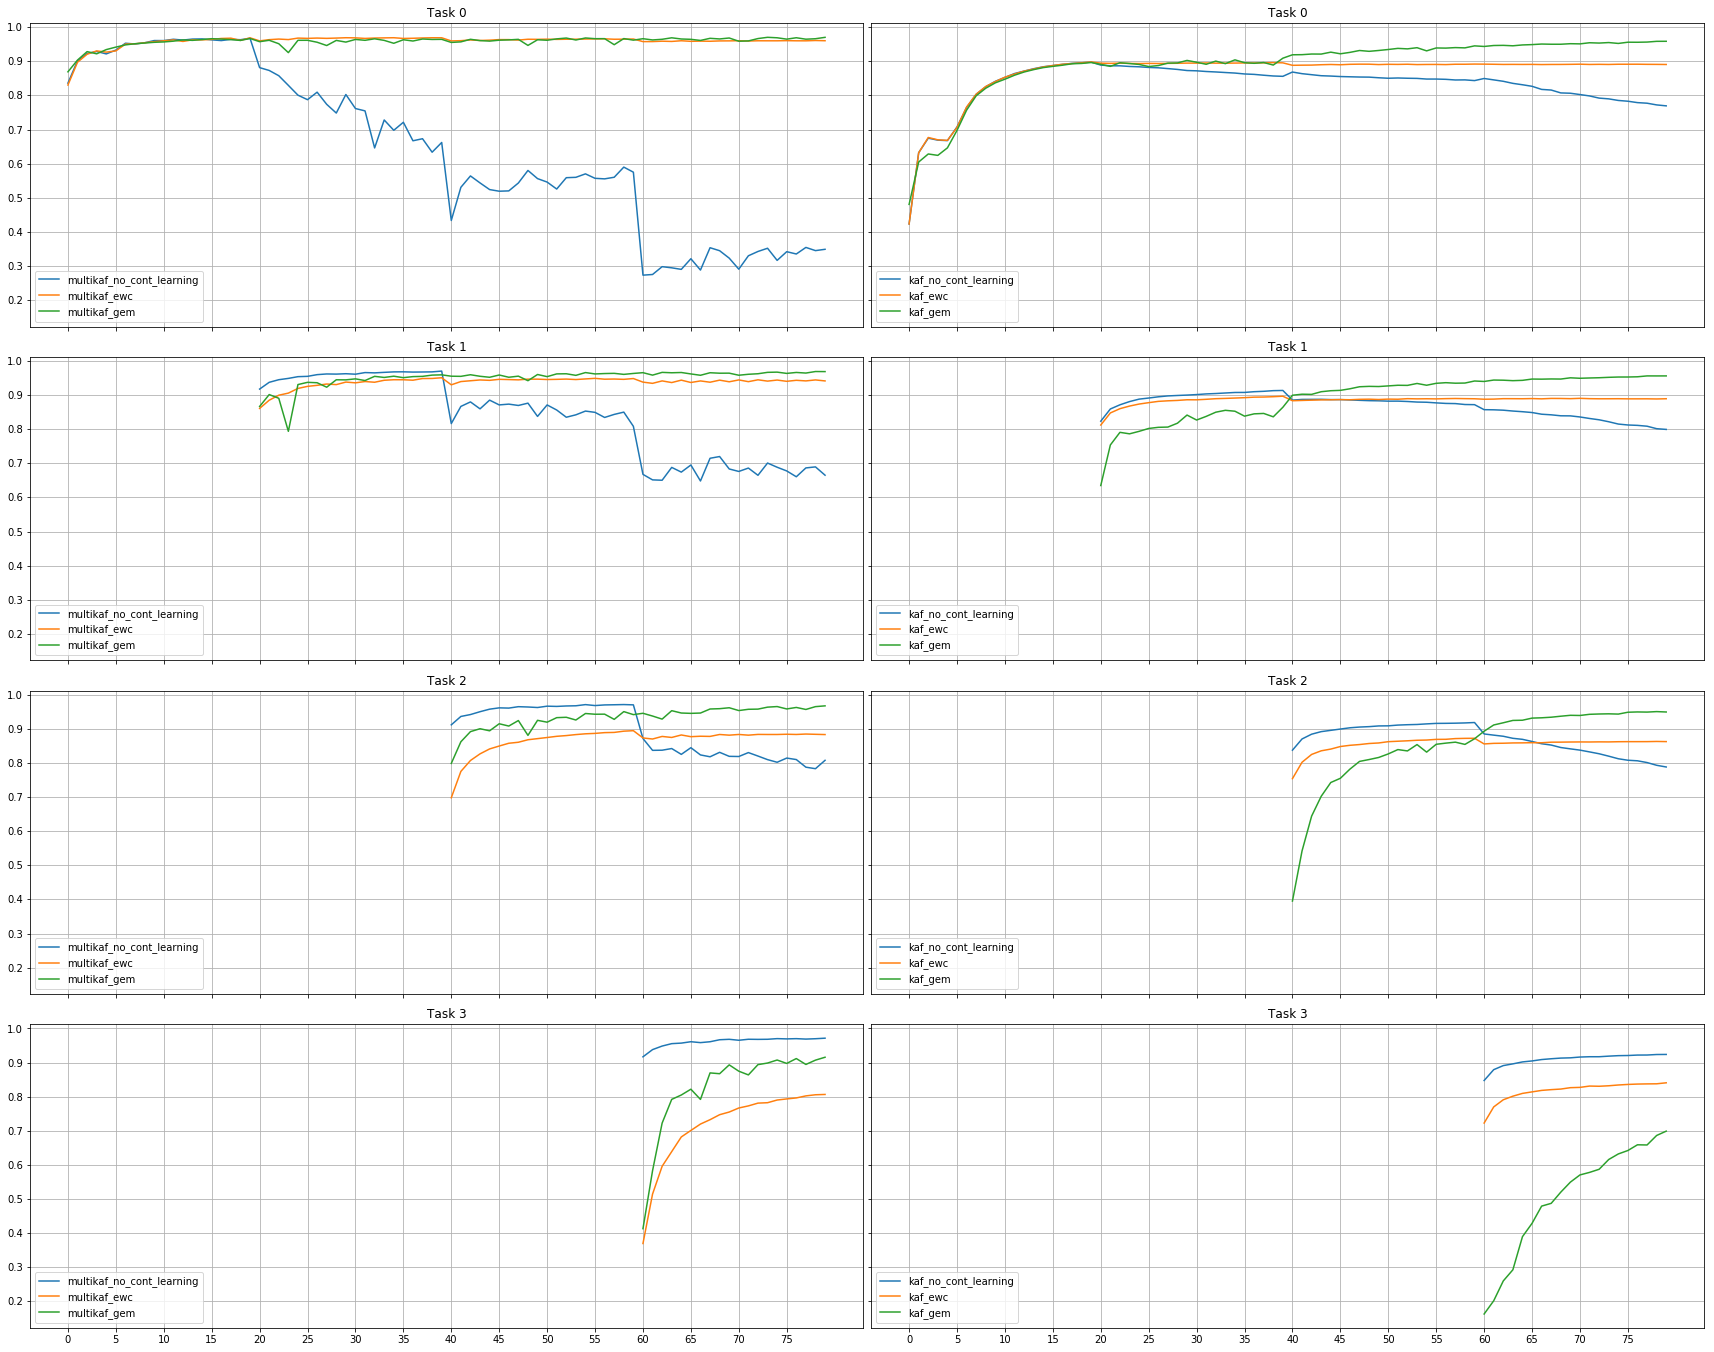

In [16]:
n_task = len(results_kaf[0][1]['tasks'])

results = []
results.extend(results_kaf)
results.extend(results_multikaf)

tot_epochs = 0

for _, r in results:
    for k, v in r['tasks'].items():
        tot_epochs = max(tot_epochs, len(v['accuracy']))
      
fig, ax = plt.subplots(nrows=n_task, ncols=2, figsize=(30, 24), sharex=True, sharey=True)

for name, r in results_multikaf:
    for i, task in enumerate(r['tasks'].keys()):

        com = r['tasks'][task]
        #no_ewt = metrics_no_ewt['tasks'][task]

        x = range(tot_epochs-len(com['accuracy']), tot_epochs)

        #ax = fig.add_subplot(n_task, 1, i+1, sharex=ax) 

        ax[i][0].plot(x, com['accuracy'], label=name)
        #ax.plot(x, no_ewt['accuracy'], label='online ewt')

        ax[i][0].set_xticks(range(0, tot_epochs, 5),minor=False)

        ax[i][0].set_title("Task {}".format(task))
        ax[i][0].legend(loc="lower left")
        ax[i][0].grid(True, axis='both')
        

for name, r in results_kaf:
    for i, task in enumerate(r['tasks'].keys()):

        com = r['tasks'][task]
        #no_ewt = metrics_no_ewt['tasks'][task]

        x = range(tot_epochs-len(com['accuracy']), tot_epochs)

        #ax = fig.add_subplot(n_task, 1, i+1, sharex=ax) 

        ax[i][1].plot(x, com['accuracy'], label=name)
        #ax.plot(x, no_ewt['accuracy'], label='online ewt')

        ax[i][1].set_xticks(range(0, tot_epochs, 5),minor=False)

        ax[i][1].set_title("Task {}".format(task))
        ax[i][1].legend(loc="lower left")
        ax[i][1].grid(True, axis='both')
        
fig.subplots_adjust(hspace=0.1, wspace=0.01)
